<H2>課題3: クラスタリング</H2>
<p>本課題で使用するデータは総務省の人口データ(http://www.stat.go.jp/data/jinsui/2016np/index.html)　を加工したものです。</p>
<p>0歳から100歳（以上）までの各年齢における総人口数、及び男女の人数が記載されています。</p>
<p>3章で学んだ内容を踏まえ、各セルに'#コメント'の内容を実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み

In [15]:
%matplotlib inline
from __future__ import print_function

try:
    xrange
except NameError:
    xrange = range

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

<H2>2. データの読み込み</H2>
<p>CSVファイル"japan_number.csv"を読み込み、内容を確認します。</p>

In [16]:
# データ読み込み
dataset = pd.read_csv('japan_number.csv')

In [17]:
# データを最初の5行だけ表示
dataset.head()

,Yearsold,Total,Man,Woman
0,0,957,489,469
1,1,970,497,474
2,2,1007,514,492
3,3,1013,518,495
4,4,1041,533,507


In [65]:
# 年齢データはカテゴリ変数であり不要なため、列'Yearsold'を削除
cols = ['Total','Man','Woman']
data_new = dataset[cols]

In [50]:
# 最初の5行を表示して列が削除されたことを確認
data_new.head()

,Total,Man,Woman
0,957,489,469
1,970,497,474
2,1007,514,492
3,1013,518,495
4,1041,533,507


<H2>3. データの正規化</H2>
<p>クラスタリングはユークリッド距離に基づいて行われるため、スケールは重要です。</p>

In [51]:
# 正規化を実施
def generate_2dim_normal( mean, variance, covariance, sample_size):
    cov = [[variance,covariance],
        [covariance,variance]]
    return np.random.multivariate_normal(mean,cov,sample_size)
cluster1 = generate_2dim_normal(mean = [0,8],variance=1,
                                covariance=0,sample_size=500)
cluster2 = generate_2dim_normal(mean = [-1,0],variance=1,
                                covariance=0,sample_size=500)
cluster3 = generate_2dim_normal(mean = [10,10],variance=1,
                                covariance=0,sample_size=300)
cluster4 = generate_2dim_normal(mean = [5,5.5],variance=0.8,
                                covariance=-0.1,sample_size=200)
data = np.vstack((cluster1,cluster2,cluster3,cluster4))

Text(0,0.5,'x2')

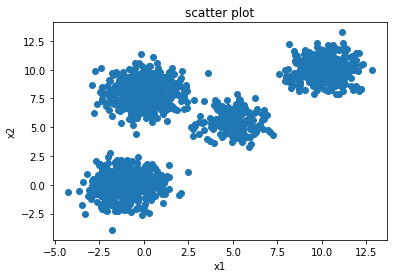

In [52]:
# 正規化後のデータを確認
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data[:,0],data[:,1])
ax.set_title('scatter plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [53]:
km = KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300)

In [54]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
cluster_labels = km.predict(data)

<H2> 4. データの可視化

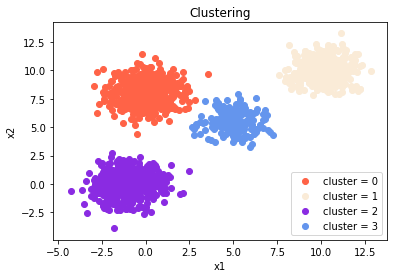

In [56]:
# 正規化したデータを散布図にPlotし、分布を確認します。
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colorlist = ['tomato','antiquewhite','blueviolet','cornflowerblue',
            'darkgreen','seashell','skyblue','mediumseagreen']
cluster_ids = list(set(cluster_labels))

for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'cluster = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:,0],data_by_cluster[:,1],
        c=colorlist[k],label=label_)
ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

<H2> 5. クラスター数の決定</H2>
<p>ここではElbow Methodとシルエットプロットを用いてクラスター数を決定してみましょう。</p>

<h3>Elbow Method

In [57]:
# 最大クラスター数を10としてWCSS値を取得
max_cluster = 10
clusters_ = range(1,max_cluster)
intra_sum_of_square_list = []
for k in clusters_:
    km = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300)
    km.fit(data)
    intra_sum_of_square_list.append(km.inertia_)

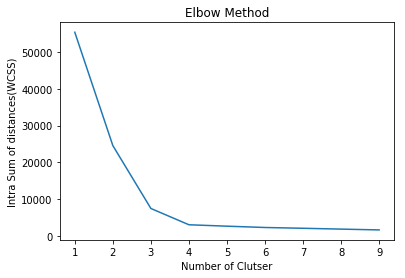

In [58]:
# 上記結果をplotにて可視化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clutser')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(clusters_,intra_sum_of_square_list)

<h3>シルエットメソッド

In [59]:
# K-means法でクラスタリングの実施
n_clusters = 4
km = KMeans(n_clusters=n_clusters,init='k-means++',n_init=10,max_iter=300)
km.fit(data)
cluster_labels = km.predict(data)

In [60]:
# シルエットスコアの平均を算出
silhouette_avg = silhouette_score(data,cluster_labels)

In [61]:
# それぞれのデータ点のシルエットスコアを算出する
each_silhouette_score = silhouette_samples(data,cluster_labels,metric='euclidean')

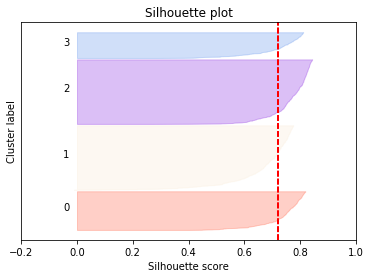

In [66]:
#  シルエットプロットを作図
colorlist = ['tomato', 'antiquewhite', 'blueviolet', 'cornflowerblue',
             'darkgreen', 'seashell', 'skyblue', 'mediumseagreen']
fig = plt.figure() 
ax = fig.add_subplot( 1, 1, 1) 
y_lower = 10 
for i in range( n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i] 
    ith_cluster_silhouette_values.sort() 
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i 
    color = colorlist[i] 
    ax.fill_betweenx(np.arange( y_lower, y_upper), 
                       0,ith_cluster_silhouette_values, 
                       facecolor = color,edgecolor = color, alpha = 0.3)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i,str(i))
    y_lower = y_upper + 10  
    ax.set_title("Silhouette plot") 
    ax.set_xlabel("Silhouette score") 
    ax.set_ylabel("Cluster label") 
    ax.axvline( x = silhouette_avg, color ="red", linestyle ="--") 
    ax.set_yticks([])
    ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

<H2>6.  結果の確認

正規化後に作成したPlotをクラスターごとに色分けし、どのようにクラスターが分かれているのか確認します。

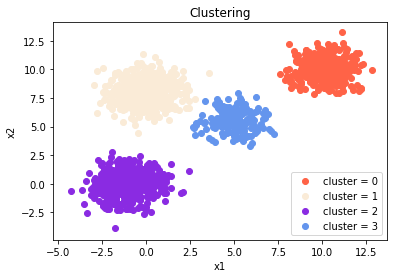

In [67]:
#　グラフの描画の初期化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#　クラスターの番号をユニークにします
cluster_ids = list(set(cluster_labels))
#　クラスターごとに色を変えながら、散布図に出力していきます
for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'cluster = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:,0],data_by_cluster[:,1],
        c=colorlist[k],label=label_)
ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')